The purpose of this notebook is to view the data distributions for the dataset. We want to make sure the data is somewhat evenly distributed among different demographic variables. Some variables that we will plot include gender, age, and health status. This step is important to see what types of biases we have in our data set or if our data is skewed to include more people of one group than another.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Read in DataFrame
df = pd.read_csv('NYSDOH_BRFSS_SurveyData_2020.csv', encoding = 'cp1252')

C:\Users\Urvi\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (39,151,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [60]:
df.head()

,_STATE,IDATE,IMONTH,IDAY,IYEAR,SEQNO,_PSU,COLGSEX,LANDSEX,RESPSLCT,...,PPS_40,PPS_43,PPS_44,PPS_45,PPS_46,PPS_48,PPS_52,SEXNOCON_OTH,NOVEGFRU_OTH,CHILDREN
0,New York,1152020,1,15,2020,2020002528,2020002528,Not asked or Missing,Not asked or Missing,Male,...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,NaN,NaN,Not asked or Missing
1,New York,1302020,1,30,2020,2020002529,2020002529,Not asked or Missing,Not asked or Missing,Male,...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,NaN,NaN,Not asked or Missing
2,New York,1152020,1,15,2020,2020002530,2020002530,Not asked or Missing,Female,Not asked or Missing,...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,NaN,NaN,Not asked or Missing
3,New York,2032020,2,3,2020,2020004509,2020004509,Not asked or Missing,Not asked or Missing,Female,...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,NaN,NaN,Not asked or Missing
4,New York,2152020,2,15,2020,2020002531,2020002531,Not asked or Missing,Not asked or Missing,Female,...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,Data do not meet the criteria for statistical ...,NaN,NaN,Not asked or Missing


In [61]:
# Use df_clean for cleaning
df_clean = df.copy()

# Repalce 'Not asked or Missing' and 'Data do not meet the criteria for statistical reliability, 
# data quality or confidentiality (data are suppressed)' with NA
for col in df.columns:
    df_clean[col].replace({'Not asked or Missing' : np.nan}, inplace = True)
    df_clean[col].replace({'Data do not meet the criteria for statistical reliability, data quality or confidentiality (data are suppressed)' : np.nan}, inplace = True)
    
# Drop columns with over 80% missing values
df_clean.dropna(axis = 1, thresh = len(df_clean) * .50, inplace = True)

In [62]:
df_clean.head(5)
df_clean.columns

Index(['_STATE', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', '_PSU',
       'CELLSEX', 'SEXVAR', 'GENHLTH',
       ...
       'WTRSOURCE', 'STRSMEAL', 'FRUITVEG', 'MJUSE30', 'MJNYSMMP', 'HEPCTEST',
       'HEPCTOLD', '_WT2SPLITS', 'REGION', 'DSRIPREG'],
      dtype='object', length=164)

Data distributions


<AxesSubplot:>

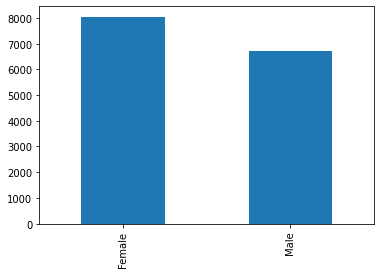

In [63]:
#Distribution by gender
df_counts = df_clean.sum()
df_clean['SEXVAR'].value_counts().plot(kind='bar')

<AxesSubplot:>

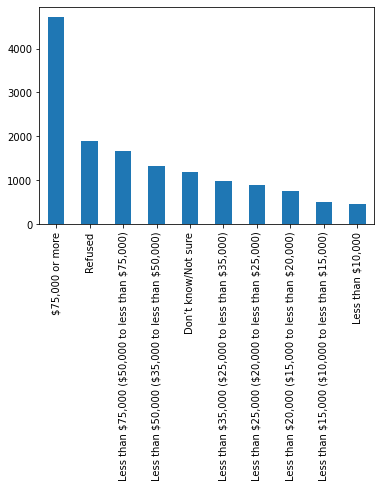

In [73]:
df_clean['INCOME2'].value_counts().plot(kind='bar')

<AxesSubplot:>

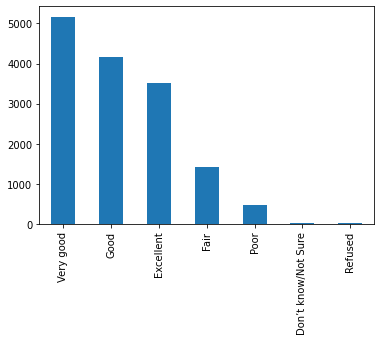

In [64]:
df_clean['GENHLTH'].value_counts().plot(kind='bar')

<AxesSubplot:>

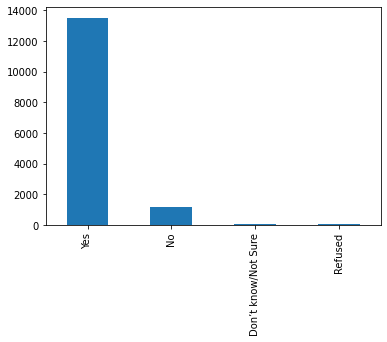

In [65]:
df_clean['HLTHPLN1'].value_counts().plot(kind='bar')

<AxesSubplot:>

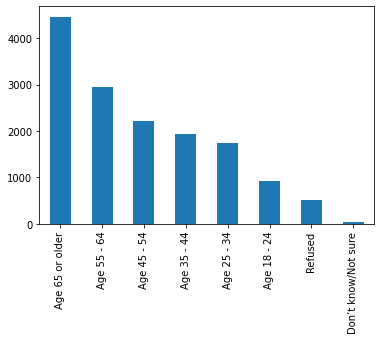

In [66]:
df_clean['AGE'].value_counts().plot(kind='bar')

The next step in our EDA is to see if the columns in our dataset are highly correlated or uncorrelated. For the unsupervised portion of the project, we want to use a form of dimensionality reduction to reduce the 300+ columns we have in our dataset to a few components. However, this method only works if the our data is already highly correlated, so we will confirm that here.

In [67]:
# Characteristics
# 1. SEXVAR - Sex - (Male or Female)
# 2. _IMPAGE - Age - (Age 65 or older, Age 55 - 64, Age 45 - 54, Age 35 - 44, Age 25 - 34, Age 18 - 24)
# 3. _IMPRACE - Race - (White, Non-Hispanic, Hispanic, Black, Non-Hispanic, Other race, Non-Hispanic, Asian, Non-Hispanic,
# American Indian/Alaskan Native, Non-Hispanic)
# 4. VETERAN3 - Former veteran status - (Yes, No, Refused, Don't know/Not sure)
# 5. WTKG3 - Weight in KG - (Continous value)
# 6. _IMPMRTL - Marital status - (Married, Never Married, Divorced, Widowed, A member of an unmarried couple, 
# Separated)
# 7. _RFBMI5 - Overweight or Obese - (Yes, No, Don’t know/Refused/Missing)


# Health 
# 8. HLTHPLN1 - Has Healthcare Coverage - (Yes, No, Don't know/Not sure, Refused)
# 9. ADDEPEV3 - Diagnosed with depression - (Yes, No, Don't know/Not sure, Refused)
# 10. DIABETE4 - Diagnosed with diabetes - (Yes, Yes, but female told only during pregnancy, 
# No, pre-diabetes or borderline diabetes, No, Don't know/Not sure, Refused)
# 11. RMVTETH4 - Number of teeth removed - All, 6 or more, but not all, 1 to 5, None, Don't know/Not sure, Refused
# 12. _PHYS14D - Number of days physical health not well - (Zero days when physical health not good,     
# 1-13 days when physical health not good, 14+ days when physical health not good, Don’t know/Refused/Missing)                 
# 13. _MENT14D - Number of days mental health not well - Zero days when mental health not good
# 1-13 days when mental health not good, 14+ days when mental health not good, Don’t know/Refused/Missing    
# 14. _TOTINDA - Physical activity - (Had physical activity or exercise, No physical activity or exercise in last 30 days,     
# Don’t know/Refused/Missing)       
# 15. PDIABTST - User has gotten a test for high blood sugar in past 3 years - (Yes, No, Don't know/Not sure, Refused)
# 16. PREDIAB1 - Diagnosed as prediabetic - Yes, Yes, during pregnancy, Don't know/Not Sure, Refused, No
# 17. _RFHLTH - General health - (Good or Better Health, Fair or Poor Health, Don’t know/Not Sure Or Refused/Missing)
# 18. BPHIGH4 - (Told they have high blood pressure - Yes, Told borderline high or pre-hypertensive, 
# Yes, but female told only during pregnancy, Don't Know/Not Sure Refused, No) 

# Lifestyle
# 19. CHECKUP1 - Length since last checkup - (Within past year (anytime less than 12 months ago), 
# Within past 2 years (1 year but less than 2 years ago), Within past 5 years (2 years but less than 5 years ago), 
# 5 or more years ago, Don’t know/Not sure, Never, Refused)
# 20. LASTDEN4 - Last visited dentist - (Within past year (anytime less than 12 months ago), 
# Within past 2 years (1 year but less than 2 years ago), Within past 5 years (2 years but less than 5 years ago), 
# 5 or more years ago, Don’t know/Not sure, Never, Refused)
# 21. FLUSHOT7 - Whether someone has taken the flu shot - (Yes, No, Don't know/Not sure, Refused)
# 22. _RFSEAT3 - Seatbeat wearing status - (Always Wear Seat Belt, Don’t Always Wear Seat Belt
# Don’t know/Not Sure Or Refused/Missing)

# Socioeconomic status
# 23. _IMPEDUC - Education - (College 4 years or more (College graduate), 
# College 1 year to 3 years (Some college or technical school), Grade 12 or GED (High school graduate), 
# Grades 9 through 11 (Some high school), Grades 1 through 8 (Elementary), Never attended school or only kindergarten)
# Grades 9 through 11 (Some high school), Grades 1 through 8 (Elementary), Never attended school or only kindergarten)
# 24. EMPLOY1 - 
# 25. _INCOMG - Income level - ($50,000 or more, Don’t know/Not sure/Missing, $15,000 to less than $25,000,   
# $35,000 to less than $50,000, $25,000 to less than $35,000, Less than $15,000)
# 26. _METSTAT - Whether they live in a metropolitan - (1, 2)

# Tobacco, Alcohol
# 27. USENOW3 - Use of smokeless tobacco - (Not at all, Some days, Every day, Refused, Don’t know/Not Sure) 
# 28. ECIGARET - E-ciggarette usage - (Yes, No, Don't know/Not sure, Refused)
# 29. _SMOKER3 - Smoking status - (Current smoker - now smokes every day, Current smoker - now smokes some days,
# Former smoker, Never smoked, Don’t know/Refused/Missing
# 30. _RFBING5 - Binge drinking status - (Yes, No, Don’t know/Refused/Missing)                

# Columns to keep - Response variable
# 31. CVDINFR4 - Ever diagnosed with heart attack - (Yes, No, Don't know/Not sure, Refused)
# 32. CVDCRHD4 - Ever diagnosed with angina/ coronary heart disease - (Yes, No, Don't know/Not sure, Refused)

# For now we will predict heart disease
df_clean_columns = df_clean[['SEXVAR', '_IMPAGE', '_IMPRACE', 'VETERAN3', 'WTKG3', '_IMPMRTL', '_RFBMI5', 
                             'HLTHPLN1', 'ADDEPEV3', 'DIABETE4', 'RMVTETH4', '_PHYS14D', '_MENT14D', '_TOTINDA',
                             'PDIABTST', 'PREDIAB1', '_RFHLTH', 'BPHIGH4', 'CHECKUP1', 'LASTDEN4', 'FLUSHOT7', 
                             '_RFSEAT3', '_IMPEDUC', 'EMPLOY1', '_INCOMG', '_METSTAT', 'USENOW3', 'ECIGARET',
                             '_SMOKER3', '_RFBING5', 'CVDCRHD4']]

In [68]:
# Encode categorical values 
cols = list(df_clean_columns.columns)
for col in cols:
    if str(df_clean_columns[col].dtype) == 'object':
        df_clean_columns[col] = df_clean_columns[col].astype('category').cat.codes

<ipython-input-68-f11c5e8ada30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_columns[col] = df_clean_columns[col].astype('category').cat.codes


In [69]:
# Drop all missing values
df_cleaned = df_clean_columns.dropna(axis = 0).reset_index(drop = True)

# Drop all rows that are Don't know/Not sure or Refused for column we are predicting
df_cleaned = df_cleaned.loc[(df_cleaned['CVDCRHD4'] == 0) | (df_cleaned['CVDCRHD4'] == 1)]
# Split into X and y
X = df_cleaned.loc[:, df_cleaned.columns != 'CVDCRHD4']
y = df_cleaned['CVDCRHD4']

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

C:\Users\Urvi\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Urvi\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [72]:
#scatter coefficient
def scatter_coefficient(X, normalize=True):
    corr = np.corrcoef(X, rowvar=False)
    if normalize:
        return np.linalg.det(corr) / np.trace(corr)
    else:
        return np.linalg.det(corr)


def psi_index(X, normalize=False):
    corr = np.corrcoef(X, rowvar=False)
    
    # Eigenvalues and eigenvectors from the correlation matrix
    eig_val, eig_vec = np.linalg.eig(corr)
    idx = eig_val.argsort()[::-1]
    eig_val = eig_val[idx]
    if normalize:
        p = X.shape[0]
        return np.sum((eig_val - 1)**2) / (p*(p-1))
    else:
        return np.sum((eig_val - 1)**2)
#X = df_clean.loc[:, df_clean.columns != 'CVDCRHD4']
print("Scatter coeff value", scatter_coefficient(X, False))
print("PSI Index", psi_index(X, False))


Scatter coeff value 0.002201700794855199
PSI Index 13.119038754458927
